In [83]:
import pandas as pd
import numpy as np
import warnings

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 30)
warnings.simplefilter(action='ignore', category=FutureWarning)

# outlier detection

In [91]:
def load_excel(file_path):
    return pd.read_excel(file_path)

def load_csv(file_path):
    return pd.read_csv(file_path)

def detect_continuous_outliers_zscore(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    df['Z_Score'] = (df[column] - mean) / std
    outliers = df[np.abs(df['Z_Score']) > threshold]
    return outliers

def continuous_outlier_analysis(df, columns, threshold=3):
    outlier_dict = {}
    new_columns = df.columns.tolist().append('Cause')
    continuous_outlier_df = pd.DataFrame(columns=columns)
    for column in columns:
        print(f"Analyzing column: {column}")
        outliers = detect_continuous_outliers_zscore(df, column, threshold)
        outlier_dict[column] = outliers
        temp_df = pd.DataFrame(columns=df.columns.tolist(), data=outliers)
        temp_df['Cause'] = column
        continuous_outlier_df = continuous_outlier_df.append(temp_df)
    continuous_outlier_df.drop_duplicates()
    return outlier_dict, continuous_outlier_df

def discrete_outliers_frequency(df, column, threshold_ratio):
    value_counts = df[column].value_counts(normalize=True)
    outliers = value_counts[value_counts < threshold_ratio]
    outlier_rows = df[df[column].isin(outliers.index)]
    return outliers, outlier_rows

def discrete_outlier_analysis(df, columns, threshold_ratio=0.001):
    outlier_dict = {}
    new_columns = df.columns.tolist()
    new_columns.append('Cause')
    print(f"columns are {new_columns}")
    discrete_outlier_df = pd.DataFrame(columns=new_columns)
    for column in columns:
        print(f"Analyzing column: {column}")
        outliers, outlier_rows = discrete_outliers_frequency(df, column, threshold_ratio)
        outlier_dict[column] = {'outliers': outliers, 'outlier_rows': outlier_rows}
        temp_df = pd.DataFrame(columns=df.columns.tolist(), data=outlier_rows)
        temp_df['Cause'] = column
        discrete_outlier_df = discrete_outlier_df.append(temp_df)
    discrete_outlier_df.drop_duplicates()
    return outlier_dict, discrete_outlier_df

In [92]:
file_path = 'data.xlsx'

continuous_columns_to_analyze = ['Quantity', 'Price', 'Value', 'DoneVolume', 'DoneValue']
discrete_columns_to_analyze = ['AccID', 'AccCode', 'SecID', 'SecCode', 'Exchange', 'Destination', 'OrderGiver', 'OrderTakerUserCode', 'OriginOfOrder']

df = load_excel(file_path)

continuous_outliers, continuous_outlier_df = continuous_outlier_analysis(df, continuous_columns_to_analyze)

for column, outlier_data in continuous_outliers.items():
    if not outlier_data.empty:
        print(f"Outliers in {column}:")
        print(outlier_data)
    else:
        print(f"No outliers in {column}")

discrete_outliers, discrete_outlier_df = discrete_outlier_analysis(df, discrete_columns_to_analyze)

for column, outlier_data in discrete_outliers.items():
    if not outlier_data['outliers'].empty:
        print(f"Outliers in {column}:")
        print(f"Outlier values and their frequencies:\n{outlier_data['outliers']}")
        print(f"Rows with outliers in {column}:\n{outlier_data['outlier_rows']}")
    else:
        print(f"No outliers in {column}")

Analyzing column: Quantity
Analyzing column: Price
Analyzing column: Value
Analyzing column: DoneVolume
Analyzing column: DoneValue
No outliers in Quantity
No outliers in Price
Outliers in Value:
      Unnamed: 0    Instance    OrderNo  ParentOrderNo  RootParentOrderNo  \
15            15  BURGERKING   72373955       56534214          624967214   
139          139  BURGERKING   72370588       20401512          316172319   
500          500  BURGERKING   72371604       64955067          123704973   
582          582  BURGERKING   72373524        7088358          433995426   
584          584  BURGERKING   72374151       46551898          128104065   
...          ...         ...        ...            ...                ...   
4785        4785  BURGERKING   72372987        8712538          648983256   
4866        4866  BURGERKING   72374512       69184293          559415326   
4904        4904  BURGERKING  172375116       70181121          712146495   
4953        4953  BURGERKING  1723

In [93]:
continuous_outlier_df.head()

,Quantity,Price,Value,DoneVolume,DoneValue,Unnamed: 0,Instance,OrderNo,ParentOrderNo,RootParentOrderNo,CreateDate,DeleteDate,AccID,AccCode,BuySell,Side,OrderSide,SecID,SecCode,Exchange,Destination,PriceMultiplier,ValueMultiplier,Currency,OrderType,PriceInstruction,TimeInForce,Lifetime,ClientOrderID,SecondaryClientOrderID,DestOrderNo,ExtDestOrderNo,DestUserID,OrderGiver,OrderTakerUserCode,IntermediaryID,OriginOfOrder,OrderCapacity,DirectedWholesale,ExecutionVenue,ExecutionInstructionsRaw,Z_Score,Cause
15,14929,55.53,6.738736e+06,5564,2.511510e+06,15.0,BURGERKING,72373955.0,56534214.0,624967214.0,2024-10-09 10:00:46,2024-02-01 12:04:48,146.0,ZM,S,3.0,Short Sell,201711726.0,MIN,ASX,ASX,0.01,0.01,AUD,2.0,Market On Close,34.0,FOK,0.851693,0.772167,1.981332e+18,17Y19YXOID3O,1651.0,robtest,admin@ROBBOTEST,15755.60008,TESTINGACC,Agency,N,0.224244,"IADW(N), IOCA(Agency), IAOR(HK)",3.234374,Value
139,15391,33.89,6.815270e+06,950,4.206683e+05,139.0,BURGERKING,72370588.0,20401512.0,316172319.0,2024-10-09 10:08:41,2024-02-01 14:44:26,167.0,NOEL,S,1.0,Short Sell,546880411.0,FMG,AXW,CXA,0.01,0.01,AUD,2.0,Market On Close,9.0,EOD,0.168058,0.590987,7.438668e+18,27Y19YXOG7UC,4142.0,robtest,admin@ROBBOTEST,41937.32083,34976,Agency,N,0.700824,"IADW(N), IOCA(Agency), IAOR(34976)",3.282654,Value
500,15518,61.48,6.908136e+06,7823,3.482559e+06,500.0,BURGERKING,72371604.0,64955067.0,123704973.0,2024-10-09 10:28:33,2024-02-01 13:30:11,78.0,NOEL,B,4.0,Buy,139108242.0,NAB,AXW,CXA,0.01,0.01,AUD,2.0,Limit,51.0,GTC,0.512373,0.716194,6.786912e+17,17Y19YXOIR97,4209.0,robbotest,admin@ROBBOTEST,116417.78770,TESTINGACC,Agency,N,0.698078,"IOCA(Principal), IADW(N)",3.341238,Value
582,15201,13.48,6.699898e+06,4727,2.083443e+06,582.0,BURGERKING,72373524.0,7088358.0,433995426.0,2024-10-09 10:32:57,2024-02-01 19:04:42,24.0,ZM,B,3.0,Short Sell,52176748.0,MQG,ASX,ASX,0.01,0.01,AUD,3.0,Limit,46.0,GTC,0.592895,0.921325,6.230557e+18,17Y19YXOIR97,4274.0,robbotest,admin@IRETEST,39281.25632,39,Agency,N,0.505260,"IADW(N), IOCA(Agency), IAOR(NOEL), IAIN(54321)",3.209873,Value
584,14945,73.77,6.689532e+06,4570,2.045578e+06,584.0,BURGERKING,72374151.0,46551898.0,128104065.0,2024-10-09 10:32:59,2024-02-01 14:13:25,10.0,UNKNOWN,B,1.0,Short Sell,545545220.0,NAB,AXW,ASX,0.01,0.01,AUD,2.0,Market On Close,57.0,GTT,0.645308,0.252556,1.822379e+18,27Y19YXOGV80,219.0,robbotest,admin@IRETEST,39147.13090,34976,Agency,N,0.702761,"IOCA(Principal), IADW(N)",3.203334,Value


# anomaly detection

C:\Users\David Powel\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\David Powel\AppData\Local\Temp\ipykernel_16148\729990042.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['anomaly'] = features['anomaly']


Number of Anomalies Detected: 50
      Quantity       Price  SecCode_A200  SecCode_AFI  SecCode_AGL  \
92       18009  230.257536             0            0            0   
130      16648  118.200634             0            0            0   
133        155   64.736723             0            0            0   
245      13648   16.766371             0            0            0   
266      15854  256.765279             0            0            0   
...        ...         ...           ...          ...          ...   
4213     15998  229.268846             0            0            0   
4290      2324  205.887874             0            0            0   
4340      5649  226.454424             0            0            0   
4546     17984  492.620200             0            0            0   
4919     14590  226.557268             0            0            0   

      SecCode_AIA  SecCode_ALD  SecCode_ALL  SecCode_ALQ  SecCode_ALX  \
92              0            0            0          

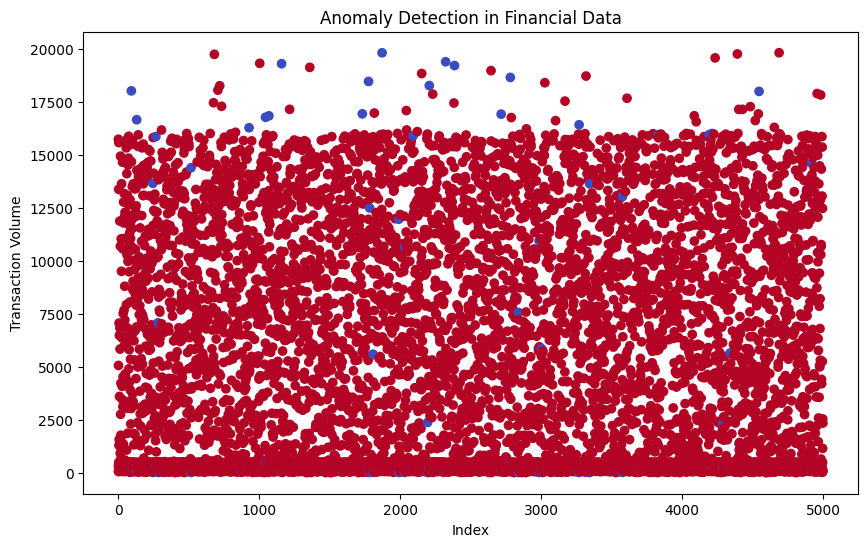

In [121]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df = load_excel(file_path)
subset = df[['Quantity', 'Price', 'SecCode']]
features = pd.get_dummies(subset, columns=['SecCode'])
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
# model = IsolationForest(n_estimators=100, random_state=42)
model.fit(features)
features['anomaly'] = model.predict(features)
subset['anomaly'] = features['anomaly']
anomalies = features[features['anomaly'] == -1]
print(f"Number of Anomalies Detected: {len(anomalies)}")
print(anomalies)

plt.figure(figsize=(10, 6))
plt.scatter(features.index, features['Quantity'], c=features['anomaly'], cmap='coolwarm')
plt.scatter(features.index, features['Price'], c=features['anomaly'], cmap='coolwarm')
plt.title('Anomaly Detection in Financial Data')
plt.xlabel('Index')
plt.ylabel('Transaction Volume')
plt.show()

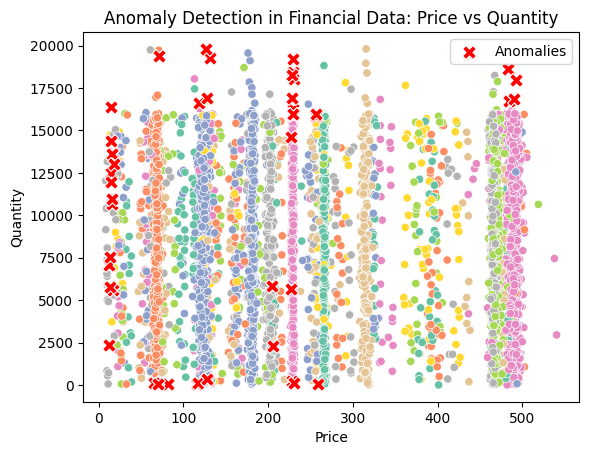

In [122]:
import seaborn as sns

sns.scatterplot(
    x='Price', 
    y='Quantity', 
    hue='SecCode',
    data=subset[subset['anomaly'] == 1],
    palette='Set2',
    legend=False
)

sns.scatterplot(
    x='Price', 
    y='Quantity', 
    data=subset[subset['anomaly'] == -1],
    color='red',
    marker='X',
    s=100,
    label='Anomalies'
)

plt.title('Anomaly Detection in Financial Data: Price vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
#plt.legend(title='SecCode', loc='upper right')
plt.show()

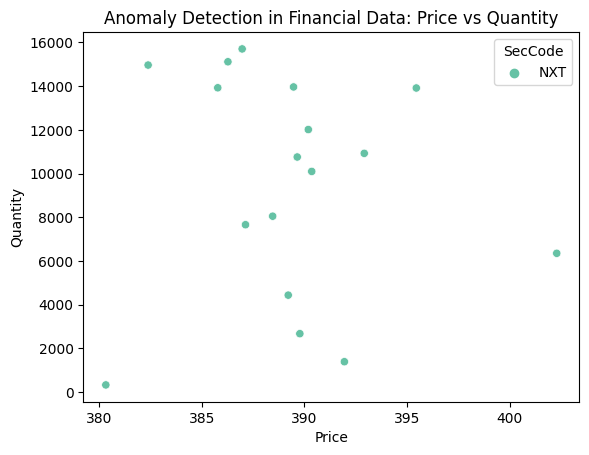

In [151]:
test = subset[subset['SecCode'] == 'NXT']

sns.scatterplot(
    x='Price', 
    y='Quantity', 
    hue='SecCode',
    data=test[test['anomaly'] == 1],
    palette='Set2',
    legend='full'
)

sns.scatterplot(
    x='Price', 
    y='Quantity', 
    data=test[test['anomaly'] == -1],
    color='red',
    marker='X',
    s=100,
    label='Anomalies'
)

plt.title('Anomaly Detection in Financial Data: Price vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.legend(title='SecCode', loc='upper right')
plt.show()

### all relevant columns

In [130]:
all_columns = discrete_columns_to_analyze + continuous_columns_to_analyze
all_subset = df[all_columns]
features = pd.get_dummies(all_subset, columns=discrete_columns_to_analyze)
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(features)
features['anomaly'] = model.predict(features)
all_subset['anomaly'] = features['anomaly']
anomalies = features[features['anomaly'] == -1]
print(f"Number of Anomalies Detected: {len(anomalies)}")
print(anomalies)

C:\Users\David Powel\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\David Powel\AppData\Local\Temp\ipykernel_16148\477619614.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_subset['anomaly'] = features['anomaly']


Number of Anomalies Detected: 50
      Quantity       Price         Value  DoneVolume     DoneValue  AccID_1  \
73       15869  487.698609  7.739289e+06       11868  5.788007e+06        0   
432       3788  183.971504  6.968841e+05        1190  2.189261e+05        0   
483      11958  402.363433  4.811462e+06        8771  3.529130e+06        0   
505      11580  465.477906  5.390234e+06        1713  7.973637e+05        0   
672      13375  490.148321  6.555734e+06        2106  1.032252e+06        0   
...        ...         ...           ...         ...           ...      ...   
4613     15413   70.417074  1.085338e+06        3020  2.126596e+05        0   
4689      6048  181.845524  1.099802e+06        4196  7.630238e+05        0   
4722      5660   67.944341  3.845650e+05        2811  1.909915e+05        0   
4852     14799  181.404139  2.684600e+06       14645  2.656664e+06        0   
4908     13880  466.722939  6.478114e+06       12692  5.923648e+06        0   

      AccID_2  Acc

In [131]:
temp = df[df.index.isin(anomalies.index.tolist())]
temp = temp.iloc[:, 1:]
temp[temp['AccCode'] != "UNKNOWN"]

,Instance,OrderNo,ParentOrderNo,RootParentOrderNo,CreateDate,DeleteDate,AccID,AccCode,BuySell,Side,OrderSide,SecID,SecCode,Exchange,Destination,Quantity,PriceMultiplier,Price,Value,ValueMultiplier,DoneVolume,DoneValue,Currency,OrderType,PriceInstruction,TimeInForce,Lifetime,ClientOrderID,SecondaryClientOrderID,DestOrderNo,ExtDestOrderNo,DestUserID,OrderGiver,OrderTakerUserCode,IntermediaryID,OriginOfOrder,OrderCapacity,DirectedWholesale,ExecutionVenue,ExecutionInstructionsRaw
432,BURGERKING,172375535,54867890,326783489,2024-10-09 10:24:36,2024-02-01 20:18:03,115,NOEL,S,1,Buy,820236574,WBC,AXW,ASX,3788,0.01,183.971504,6.968841e+05,0.01,1190,2.189261e+05,AUD,2,Limit,43,GTC,0.080897,0.611783,923329847782032000,17Y19YXOIR97,478,robbotest,admin@IRETEST,42319.57852,NOEL,Principal,N,0.251490,"IADW(N), IOCA(Agency), IAOR(34976)"
483,BURGERKING,72374890,35378868,476609856,2024-10-09 10:27:08,2024-02-01 18:34:22,13,NOEL,S,4,Long Sell,498120941,GQG,AXW,CXA,11958,0.01,402.363433,4.811462e+06,0.01,8771,3.529130e+06,AUD,4,Market On Close,34,EOD,0.220481,0.474500,6613051250621689856,17Y19YXOGMGT,171,robtest,admin@ROBBOTEST,24157.33851,NOEL,Agency,N,0.576801,"IADW(N), IOCA(Agency), IAOR(39)"
505,BURGERKING,72372953,49275149,237714252,2024-10-09 10:29:08,2024-02-01 12:25:02,22,NOEL,S,1,Buy,292993089,WES,AXW,ASX,11580,0.01,465.477906,5.390234e+06,0.01,1713,7.973637e+05,AUD,2,Limit,51,FAK,0.647359,0.209652,4771980638797809664,27Y19YXOG7UF,2582,robtest,admin@IRETEST,106335.83520,HK,Agency,N,0.535704,"IADW(N), IOCA(Agency), IAOR(34976)"
672,BURGERKING,72371016,46236912,647947253,2024-10-09 10:36:56,2024-02-01 16:37:39,13,NOEL,B,4,Long Sell,104234188,CBA,ASX,CXA,13375,0.01,490.148321,6.555734e+06,0.01,2106,1.032252e+06,AUD,3,Market On Close,58,GTT,0.957946,0.278147,6690279286369359872,27Y19YXOGV80,4303,robbotest,admin@ROBBOTEST,74580.16126,39,Principal,N,0.046815,"IAOR(TESTINGACC), IOCA(Principal), IADW(N)"
708,BURGERKING,72375304,16501749,570372666,2024-10-09 10:39:03,2024-02-01 17:41:14,172,ZM,B,2,Long Sell,637372274,SEK,ASX,CXA,1755,0.01,476.482964,8.362276e+05,0.01,1738,8.281274e+05,AUD,4,Limit,54,FAK,0.537225,0.794143,4687342336360890368,27Y19YXOG7UD,3974,robbotest,admin@ROBBOTEST,26429.23879,NOEL,Agency,N,0.855916,"IAOR(TESTINGACC), IOCA(Principal), IADW(N)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476,BURGERKING,72370435,17659316,177405323,2024-10-09 15:31:27,2024-02-01 11:41:40,22,ROBBO,S,2,Buy,1244356391,MQG,ASX,CXA,5311,0.01,464.378327,2.466313e+06,0.01,2953,1.371309e+06,AUD,2,Limit,61,FAK,0.382528,0.514302,7576764035381990400,17Y19YXOGMGT,4345,robtest,admin@ROBBOTEST,45264.46802,ROBTESTING,Agency,N,0.575724,"IAOR(ROBTESTING), IOCA(Agency), IADW(N), IAIN(..."
4479,BURGERKING,72374672,27437568,381090740,2024-10-09 15:31:35,2024-02-01 16:19:00,192,ROBBO,S,1,Short Sell,307592726,WBC,AXW,CXA,15188,0.01,182.437201,2.770856e+06,0.01,127,2.316952e+04,AUD,3,Market On Close,1,FOK,0.555828,0.615544,339985918903628032,27Y19YXOG7UA,361,robtest,admin@ROBBOTEST,36259.91469,NOEL,Agency,N,0.139550,"IADW(N), IOCA(Agency), IAOR(39)"
4586,BURGERKING,72375182,22037152,179145455,2024-10-09 15:37:43,2024-02-01 13:35:14,145,NOEL,B,3,Buy,384061053,WES,ASX,CXA,15237,0.01,466.917688,7.114425e+06,0.01,13864,6.473347e+06,AUD,4,Market On Close,1,FOK,0.530054,0.946787,7269443619652660224,6C824B04:0001A319,2636,robbotest,admin@ROBBOTEST,44926.56938,TESTINGACC,Agency,N,0.889685,"IOAR(NOEL), IOCA(Agency), IAIN(12345)"
4613,BURGERKING,172369852,59314420,413396924,2024-10-09 15:39:17,2024-02-01 15:56:12,107,NOEL,B,2,Short Sell,499251571,BHP,AXW,CXA,15413,0.01,70.417074,1.085338e+06,0.01,3020,2.126596e+05,AUD,4,Market On Close,51,FAK,0.265729,0.051502,2164458518045530112,27Y19YXOG7UE,5603,robbotest,admin@IRETEST,93786.24693,NOEL,Agency,N,0.195655,"IADW(N), IOCA(Agency), IAOR(NOEL), IAIN(54321)"


In [132]:
temp.SecCode.value_counts()

WBC    16
CBA     6
BHP     5
WES     4
GQG     3
SEK     3
PME     3
SVW     2
MQG     2
GMG     1
NAB     1
SUN     1
S32     1
NXT     1
CPU     1
Name: SecCode, dtype: int64

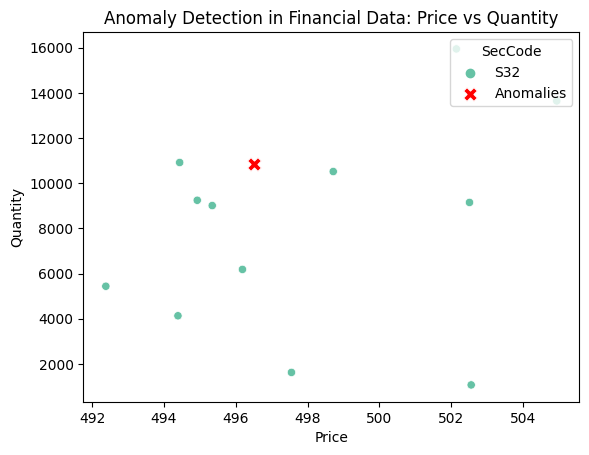

In [152]:
test = all_subset[all_subset['SecCode'] == 'S32']

sns.scatterplot(
    x='Price', 
    y='Quantity', 
    hue='SecCode',
    data=test[test['anomaly'] == 1],
    palette='Set2',
    legend='full'
)

sns.scatterplot(
    x='Price', 
    y='Quantity', 
    data=test[test['anomaly'] == -1],
    color='red',
    marker='X',
    s=100,
    label='Anomalies'
)

plt.title('Anomaly Detection in Financial Data: Price vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.legend(title='SecCode', loc='upper right')
plt.show()